In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, f1_score, auc


sns.set(style="whitegrid")
sns.set_color_codes("pastel")

In [2]:
full_train = pd.read_csv("datasets/train_clean.csv")

to_drop = ["Name", "Ticket", "Embarked", "PassengerId", *[c for c in full_train if "cabin" in c.lower()]]

full_train.drop(columns=to_drop, inplace=True)

target_col = "Survived"

X = full_train.drop(target_col, axis=1)
y = full_train[target_col]

X_train, y_train = X, y

model = SVC(
    probability=True,
    random_state=42,
)

# Define the parameter grid for GridSearchCV
# param_grid = {
#     'C': [1, 10, 100],
#     'kernel': ['linear'],
#     'gamma': ['scale']
# }

param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
    'degree': [2, 3, 4],
    'coef0': [1, 10],
    'gamma': ['scale']
}

param_grid = {
    'C': [0.001, 0.01, 0.1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ["scale"],
    'degree': [2, 3, 4, 5],
    'coef0': [0.1, 1, 10],
    'max_iter': [500, 1000, 10000, 100000]
}

# param_grid = {
#     'C': [0.00001, 0.0001],
#     'kernel': ['poly'],
#     'gamma': ["scale"],
#     'degree': [5],
#     'coef0': [10]
# }


grid_search = GridSearchCV(model, param_grid, n_jobs=1, cv=5, scoring='accuracy', verbose=4)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
# print(f"Accuracy on Test Set: {accuracy:.4f}")
print(f"Best Score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END C=0.001, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.618 total time=   0.0s
[CV 2/5] END C=0.001, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.618 total time=   0.0s
[CV 3/5] END C=0.001, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.618 total time=   0.0s
[CV 4/5] END C=0.001, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.618 total time=   0.0s
[CV 5/5] END C=0.001, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.616 total time=   0.0s
[CV 1/5] END C=0.001, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.618 total time=   0.0s
[CV 2/5] END C=0.001, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.618 total time=   0.0s
[CV 3/5] END C=0.001, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.618 total time=   0.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 3/5] END C=0.001, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=500;, score=0.815 total time=   0.1s
[CV 4/5] END C=0.001, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=500;, score=0.770 total time=   0.1s
[CV 5/5] END C=0.001, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=500;, score=0.836 total time=   0.1s
[CV 1/5] END C=0.001, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.831 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.001, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.820 total time=   0.1s
[CV 3/5] END C=0.001, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.815 total time=   0.1s
[CV 4/5] END C=0.001, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.775 total time=   0.1s
[CV 5/5] END C=0.001, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.831 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.001, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.831 total time=   0.0s
[CV 2/5] END C=0.001, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.0s
[CV 3/5] END C=0.001, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.815 total time=   0.0s
[CV 4/5] END C=0.001, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.775 total time=   0.0s
[CV 5/5] END C=0.001, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.831 total time=   0.0s
[CV 1/5] END C=0.001, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.831 total time=   0.0s
[CV 2/5] END C=0.001, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.820 total time=   0.0s
[CV 3/5] END C=0.001, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.815 total time=   0.0s
[CV 4/5] END C=0.001, coef0=10, degree=4, gamma=scale, kernel=poly, m

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 2/5] END C=0.001, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.820 total time=   0.0s
[CV 3/5] END C=0.001, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.820 total time=   0.0s
[CV 4/5] END C=0.001, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.798 total time=   0.0s
[CV 5/5] END C=0.001, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.847 total time=   0.0s
[CV 1/5] END C=0.001, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.826 total time=   0.0s
[CV 2/5] END C=0.001, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.820 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 3/5] END C=0.001, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.815 total time=   0.0s
[CV 4/5] END C=0.001, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.792 total time=   0.0s
[CV 5/5] END C=0.001, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.842 total time=   0.0s
[CV 1/5] END C=0.001, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.843 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.001, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.1s
[CV 3/5] END C=0.001, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.1s
[CV 4/5] END C=0.001, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.792 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.001, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.847 total time=   0.1s
[CV 1/5] END C=0.001, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.843 total time=   0.1s
[CV 2/5] END C=0.001, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.820 total time=   0.1s
[CV 3/5] END C=0.001, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.820 total time=   0.1s
[CV 4/5] END C=0.001, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.001, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.847 total time=   0.1s
[CV 1/5] END C=0.01, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.01, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.01, coef0=0.1, degree=2, gamma=scale, kernel=linea

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.01, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.798 total time=   0.0s
[CV 4/5] END C=0.01, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.781 total time=   0.0s
[CV 5/5] END C=0.01, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.836 total time=   0.0s
[CV 1/5] END C=0.01, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.831 total time=   0.0s
[CV 2/5] END C=0.01, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.01, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.798 total time=   0.0s
[CV 4/5] END C=0.01, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.781 total time=   0.0s
[CV 5/5] END C=0.01, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.836 total 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=0.01, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.826 total time=   0.0s
[CV 2/5] END C=0.01, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.820 total time=   0.0s
[CV 3/5] END C=0.01, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.798 total time=   0.0s
[CV 4/5] END C=0.01, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.764 total time=   0.0s
[CV 5/5] END C=0.01, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.808 total time=   0.0s
[CV 1/5] END C=0.01, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.826 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 2/5] END C=0.01, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.820 total time=   0.0s
[CV 3/5] END C=0.01, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.798 total time=   0.0s
[CV 4/5] END C=0.01, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.764 total time=   0.0s
[CV 5/5] END C=0.01, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.808 total time=   0.0s
[CV 1/5] END C=0.01, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.826 total time=   0.0s
[CV 2/5] END C=0.01, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.0s
[CV 3/5] END C=0.01, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.798 total time=   0.0s
[CV 4/5] END C=0.01, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.764 total time=   0.0s
[CV 5/5] END C=0.01, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=10000;, 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=0.01, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.843 total time=   0.0s
[CV 2/5] END C=0.01, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.01, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.820 total time=   0.0s
[CV 4/5] END C=0.01, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.792 total time=   0.0s
[CV 5/5] END C=0.01, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.847 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 1/5] END C=0.01, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.843 total time=   0.1s
[CV 2/5] END C=0.01, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.815 total time=   0.1s
[CV 3/5] END C=0.01, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.01, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.842 total time=   0.1s
[CV 1/5] END C=0.01, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.843 total time=   0.1s
[CV 2/5] END C=0.01, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.815 total time=   0.1s
[CV 3/5] END C=0.01, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.820 total time=   0.1s
[CV 4/5] END C=0.01, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.01, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.842 total time=   0.1s
[CV 1/5] END C=0.01, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.01, coef0=10, degree=5, gamma=scale, kernel=linear, max_it

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=0.01, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.01, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.713 total time=   0.0s
[CV 3/5] END C=0.01, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.506 total time=   0.0s
[CV 4/5] END C=0.01, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.708 total time=   0.0s
[CV 5/5] END C=0.01, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.452 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 1/5] END C=0.01, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.1s
[CV 2/5] END C=0.01, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.826 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.2s
[CV 4/5] END C=0.01, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.775 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.847 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.803 total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.831 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.837 total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.775 total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  

[CV 5/5] END C=0.01, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.853 total time=   0.4s
[CV 1/5] END C=0.1, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.753 total time=   0.1s
[CV 5/5] END C=0.1, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.785 total time=   0.1s
[CV 1/5] END C=0.1, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s
[CV 3/5] END C=0.1, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.787 total time=   0.1s
[CV 4/5] END C=0.1, coef0=0.1, degree=2, gamma=scale, kernel=

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 2/5] END C=0.1, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=500;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=500;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=500;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=500;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.815 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=0.1, degree=3, gamma=scale, kernel=linear

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 4/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.753 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=100000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=li

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.826 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.820 total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.792 total time=   0.0s
[CV 4/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.775 total time=   0.0s
[CV 5/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.836 total time=   0.0s
[CV 1/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.826 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.792 total time=   0.0s
[CV 4/5] END C=0.1, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=10000;, s

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 4/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.753 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=li

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 3/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.809 total time=   0.0s
[CV 4/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.775 total time=   0.0s
[CV 5/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.836 total time=   0.0s
[CV 1/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.820 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.820 total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.809 total time=   0.0s
[CV 4/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.775 total time=   0.0s
[CV 5/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.836 total time=   0.0s
[CV 1/5] END C=0.1, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 2/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=rbf, max_iter=50

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 2/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=500;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=500;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=500;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=500;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.815 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=100000;

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 4/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.770 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.831 total time=   0.0s
[CV 1/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.831 total time=   0.0s
[CV 2/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.820 total time=   0.0s
[CV 3/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.792 total time=   0.0s
[CV 4/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.770 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.831 total time=   0.0s
[CV 1/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.831 total time=   0.0s
[CV 2/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 2/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.815 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=100000;

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.831 total time=   0.0s
[CV 2/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.820 total time=   0.0s
[CV 3/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.820 total time=   0.0s
[CV 4/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.792 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.836 total time=   0.0s
[CV 1/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.831 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 2/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.0s
[CV 3/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.0s
[CV 4/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.792 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.836 total time=   0.0s
[CV 1/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.831 total time=   0.0s
[CV 2/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.820 total time=   0.0s
[CV 3/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.820 total time=   0.0s
[CV 4/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.792 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.8

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 3/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=10000

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.831 total time=   0.0s
[CV 2/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.820 total time=   0.0s
[CV 3/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.815 total time=   0.0s
[CV 4/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.775 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.847 total time=   0.0s
[CV 1/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.826 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 2/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.820 total time=   0.0s
[CV 3/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.815 total time=   0.1s
[CV 4/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.775 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.836 total time=   0.0s
[CV 1/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.826 total time=   0.0s
[CV 2/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.0s
[CV 3/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.815 total time=   0.1s
[CV 4/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.775 total time=   0.1s
[CV 5/5] END C=0.1, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.836 total 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 2/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.815 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=linear, max_ite

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.815 total time=   0.0s
[CV 2/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.797 total time=   0.0s
[CV 1/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=10000;, score=0.815 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=10000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=10000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=10000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=10000;, score=0.797 total time=   0.0s
[CV 1/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=100000;, score=0.815 total time=   0.0s
[CV 2/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=100000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=100000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=100000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=100000;, 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 4/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=500;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=500;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.753 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=100000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=linear, max

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.837 total time=   0.0s
[CV 2/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.820 total time=   0.0s
[CV 3/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.809 total time=   0.0s
[CV 4/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.792 total time=   0.0s
[CV 5/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.836 total time=   0.0s
[CV 1/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.837 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 2/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.820 total time=   0.0s
[CV 3/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.820 total time=   0.0s
[CV 4/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.792 total time=   0.0s
[CV 5/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.842 total time=   0.0s
[CV 1/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.831 total time=   0.1s
[CV 2/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.1s
[CV 3/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.1s
[CV 4/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.1, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.8

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 4/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.753 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=100000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=linear, max

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.697 total time=   0.0s
[CV 2/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.528 total time=   0.0s
[CV 3/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.758 total time=   0.0s
[CV 5/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.808 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 1/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.831 total time=   0.1s
[CV 2/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.1s
[CV 4/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.775 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.853 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.820 total time=   0.3s
[CV 2/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.820 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.820 total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.775 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  

[CV 5/5] END C=0.1, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.853 total time=   0.3s
[CV 1/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=1000;, s

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=linear, 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 3/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.393 total time=   0.0s
[CV 4/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.416 total time=   0.0s
[CV 5/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.356 total time=   0.0s
[CV 1/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.522 total time=   0.0s
[CV 2/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.494 total time=   0.0s
[CV 3/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.624 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 4/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.478 total time=   0.0s
[CV 5/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.418 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.798 total time=   0.2s
[CV 2/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.2s
[CV 4/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.798 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.763 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.787 total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.803 total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.831 total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.770 total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  

[CV 5/5] END C=0.1, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.825 total time=   0.8s
[CV 1/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.680 total time=   0.0s
[CV 2/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.511 total time=   0.0s
[CV 3/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.376 total time=   0.0s
[CV 4/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.281 total time=   0.0s
[CV 5/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.407 total time=   0.0s
[CV 1/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 2/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 3/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.1s
[CV 4/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s
[CV 5/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.797 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.820 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.1s
[CV 3/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.798 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.770 total time=   0.1s
[CV 5/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.797 total time=   0.1s
[CV 1/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.798 total time=   0.1s
[CV 4/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.770 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[CV 5/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.802 total time=   0.2s
[CV 1/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=rbf, max_iter=500;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 3/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 4/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=rbf, max_iter=500;, score=0.781 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  

[CV 5/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=rbf, max_iter=500;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=rbf, max_iter=10000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 4/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=rbf, max_iter=10000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=rbf, max_iter=10000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=rbf, max_iter=100000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=rbf, max_iter=100000;, score=0.820 to

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=poly, max_iter=500;, score=0.837 total time=   0.0s
[CV 2/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=poly, max_iter=500;, score=0.820 total time=   0.0s
[CV 3/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=poly, max_iter=500;, score=0.820 total time=   0.0s
[CV 4/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=poly, max_iter=500;, score=0.781 total time=   0.0s
[CV 5/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=poly, max_iter=500;, score=0.847 total time=   0.0s
[CV 1/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.831 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 2/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.820 total time=   0.0s
[CV 4/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.781 total time=   0.0s
[CV 5/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.847 total time=   0.0s
[CV 1/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=poly, max_iter=10000;, score=0.831 total time=   0.0s
[CV 2/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.1s
[CV 4/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=poly, max_iter=10000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=0.1, degree=2, gamma=scale, kernel=poly, max_iter=10000;, score=0.8

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s
[CV 2/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 3/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s
[CV 4/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s
[CV 5/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.797 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 1/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.820 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.1s
[CV 3/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.798 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.770 total time=   0.1s
[CV 5/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.797 total time=   0.1s
[CV 1/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=100000;, score=0.798 total time=   0.1s
[CV 4/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=100000;, score=0.770 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[CV 5/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=linear, max_iter=100000;, score=0.802 total time=   0.2s
[CV 1/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=500;, score=0.837 total time=   0.0s
[CV 2/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 3/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 4/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=500;, score=0.781 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  

[CV 5/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=500;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=1000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=1000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=1000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=10000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 4/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=10000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=10000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=100000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=100000;, score=0.820 to

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.803 total time=   0.0s
[CV 2/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.831 total time=   0.0s
[CV 3/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.725 total time=   0.0s
[CV 4/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.781 total time=   0.0s
[CV 5/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.825 total time=   0.0s
[CV 1/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.803 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 2/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.820 total time=   0.0s
[CV 3/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.815 total time=   0.0s
[CV 4/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.775 total time=   0.0s
[CV 5/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.847 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.803 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.815 total time=   0.1s
[CV 4/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.764 total time=   0.1s
[CV 5/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=poly, max_iter=100000;, score=0.803 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=poly, max_iter=100000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=poly, max_iter=100000;, score=0.815 total time=   0.1s
[CV 4/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=poly, max_iter=100000;, score=0.764 total time=   0.1s
[CV 5/5] END C=10, coef0=0.1, degree=3, gamma=scale, kernel=poly, max_iter=100000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.680 total time=   0.0s
[CV 2/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.511 total time=   0.0s
[CV 3/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.376 total time=   0.0s
[CV 4/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.281 total time=   0.0s
[CV 5/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=500;, s

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 2/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 3/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s
[CV 4/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s
[CV 5/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.797 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.820 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.1s
[CV 3/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.798 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.770 total time=   0.1s
[CV 5/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.797 total time=   0.1s
[CV 1/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=100000;, score=0.798 total time=   0.1s
[CV 4/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=100000;, score=0.770 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[CV 5/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=linear, max_iter=100000;, score=0.802 total time=   0.2s
[CV 1/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=500;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 3/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 4/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=500;, score=0.781 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  

[CV 5/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=500;, score=0.853 total time=   0.0s
[CV 1/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=1000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=1000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=1000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=10000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 4/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=10000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=10000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=100000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=100000;, score=0.820 to

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=500;, score=0.753 total time=   0.0s
[CV 2/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=500;, score=0.781 total time=   0.0s
[CV 3/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=500;, score=0.781 total time=   0.0s
[CV 4/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=500;, score=0.803 total time=   0.0s
[CV 5/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=500;, score=0.791 total time=   0.0s
[CV 1/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.775 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 2/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.831 total time=   0.0s
[CV 3/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.809 total time=   0.0s
[CV 4/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.792 total time=   0.0s
[CV 5/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.847 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.787 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.831 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.815 total time=   0.1s
[CV 4/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.781 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.859 total time=   0.1s
[CV 1/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.787 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.831 total time=   0.1s
[CV 3/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.815 total time=   0.2s
[CV 4/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=0.1, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.859 total time=   0.1s
[CV 1/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.680 total time=   0.0s
[CV 2/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.511 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 3/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.376 total time=   0.0s
[CV 4/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.281 total time=   0.0s
[CV 5/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.407 total time=   0.0s
[CV 1/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s
[CV 2/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 3/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 4/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s
[CV 5/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.797 total time=   0.0s
[CV 1/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.820 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.1s
[CV 3/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.798 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.770 total time=   0.1s
[CV 5/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.797 total time=   0.1s
[CV 1/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.798 total time=   0.1s
[CV 4/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.770 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[CV 5/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.802 total time=   0.2s
[CV 1/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=500;, score=0.837 total time=   0.0s
[CV 2/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 3/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 4/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=500;, score=0.781 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  

[CV 5/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=500;, score=0.853 total time=   0.0s
[CV 1/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=1000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=1000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=1000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=10000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 4/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=10000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=10000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=100000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=100000;, score=0.820 to

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.567 total time=   0.0s
[CV 2/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.590 total time=   0.0s
[CV 3/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.511 total time=   0.0s
[CV 4/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.809 total time=   0.0s
[CV 5/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.424 total time=   0.0s
[CV 1/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.809 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 2/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.815 total time=   0.0s
[CV 3/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.803 total time=   0.1s
[CV 4/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.534 total time=   0.1s
[CV 5/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.712 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.787 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.809 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.809 total time=   0.1s
[CV 4/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.775 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.842 total time=   0.1s
[CV 1/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.787 total time=   0.1s
[CV 2/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.809 total time=   0.2s
[CV 3/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.809 total time=   0.2s
[CV 4/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.781 total time=   0.2s
[CV 5/5] END C=10, coef0=0.1, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.847 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.680 total time=   0.0s
[CV 2/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.511 total time=   0.0s
[CV 3/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.376 total time=   0.0s
[CV 4/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.281 total time=   0.0s
[CV 5/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.407 total time=   0.0s
[CV 1/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 2/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 3/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s
[CV 4/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s
[CV 5/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.797 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.820 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.1s
[CV 3/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.798 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.770 total time=   0.1s
[CV 5/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.797 total time=   0.1s
[CV 1/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.798 total time=   0.1s
[CV 4/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.770 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[CV 5/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.802 total time=   0.2s
[CV 1/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=rbf, max_iter=500;, score=0.837 total time=   0.0s
[CV 2/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 3/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 4/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=rbf, max_iter=500;, score=0.781 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  

[CV 5/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=rbf, max_iter=500;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=rbf, max_iter=10000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 4/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=rbf, max_iter=10000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=rbf, max_iter=10000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=rbf, max_iter=100000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=rbf, max_iter=100000;, score=0.820 total time=   0.1s
[

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=poly, max_iter=500;, score=0.831 total time=   0.0s
[CV 2/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=poly, max_iter=500;, score=0.826 total time=   0.0s
[CV 3/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=poly, max_iter=500;, score=0.820 total time=   0.0s
[CV 4/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=poly, max_iter=500;, score=0.792 total time=   0.0s
[CV 5/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=poly, max_iter=500;, score=0.853 total time=   0.0s
[CV 1/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.843 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 2/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.815 total time=   0.0s
[CV 3/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.820 total time=   0.0s
[CV 4/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.792 total time=   0.0s
[CV 5/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.847 total time=   0.0s
[CV 1/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=poly, max_iter=10000;, score=0.843 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=poly, max_iter=10000;, score=0.815 total time=   0.1s
[CV 3/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.1s
[CV 4/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=poly, max_iter=10000;, score=0.792 total time=   0.1s
[CV 5/5] END C=10, coef0=1, degree=2, gamma=scale, kernel=poly, max_iter=10000;, score=0.842 total time=   0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 5/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=500;, score=0.407 total time=   0.0s
[CV 1/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s
[CV 2/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 3/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s
[CV 4/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 5/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.797 total time=   0.0s
[CV 1/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.820 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.798 total time=   0.1s
[CV 4/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.770 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.797 total time=   0.1s
[CV 1/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s
[CV 3/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=100000;, score=0.798 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=100000;, score=0.770 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  

[CV 5/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=linear, max_iter=100000;, score=0.802 total time=   0.2s
[CV 1/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=rbf, max_iter=500;, score=0.837 total time=   0.0s
[CV 2/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 3/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 4/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=rbf, max_iter=500;, score=0.781 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  

[CV 5/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=rbf, max_iter=500;, score=0.853 total time=   0.0s
[CV 1/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=rbf, max_iter=1000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=rbf, max_iter=1000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=rbf, max_iter=1000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=rbf, max_iter=10000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 4/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=rbf, max_iter=10000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=rbf, max_iter=10000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=rbf, max_iter=100000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=rbf, max_iter=100000;, score=0.820 total time=   0.1s
[

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.657 total time=   0.0s
[CV 2/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.618 total time=   0.0s
[CV 3/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.449 total time=   0.0s
[CV 4/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.742 total time=   0.0s
[CV 5/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.695 total time=   0.0s
[CV 1/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.787 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 2/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.826 total time=   0.0s
[CV 3/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.820 total time=   0.0s
[CV 4/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.787 total time=   0.0s
[CV 5/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.847 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.809 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.826 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.815 total time=   0.1s
[CV 4/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.770 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=100000;, score=0.809 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=100000;, score=0.826 total time=   0.1s
[CV 3/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=100000;, score=0.815 total time=   0.2s
[CV 4/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=100000;, score=0.770 total time=   0.1s
[CV 5/5] END C=10, coef0=1, degree=3, gamma=scale, kernel=poly, max_iter=100000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.680 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 2/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.511 total time=   0.0s
[CV 3/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.376 total time=   0.0s
[CV 4/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.281 total time=   0.0s
[CV 5/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.407 total time=   0.0s
[CV 1/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s
[CV 2/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 3/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s
[CV 4/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s
[CV 5/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.797 total time=   0.0s
[CV 1/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.820 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.1s
[CV 3/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.798 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.770 total time=   0.1s
[CV 5/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.797 total time=   0.2s
[CV 1/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=100000;, score=0.798 total time=   0.1s
[CV 4/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=100000;, score=0.770 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[CV 5/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=linear, max_iter=100000;, score=0.802 total time=   0.2s
[CV 1/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=rbf, max_iter=500;, score=0.837 total time=   0.0s
[CV 2/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 3/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 4/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=rbf, max_iter=500;, score=0.781 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  

[CV 5/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=rbf, max_iter=500;, score=0.853 total time=   0.0s
[CV 1/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=rbf, max_iter=1000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=rbf, max_iter=1000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=rbf, max_iter=1000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=rbf, max_iter=10000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 4/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=rbf, max_iter=10000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=rbf, max_iter=10000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=rbf, max_iter=100000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=rbf, max_iter=100000;, score=0.820 total time=   0.1s
[

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=500;, score=0.646 total time=   0.0s
[CV 2/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=500;, score=0.551 total time=   0.0s
[CV 3/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=500;, score=0.640 total time=   0.0s
[CV 4/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=500;, score=0.472 total time=   0.0s
[CV 5/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=500;, score=0.672 total time=   0.0s
[CV 1/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.770 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 2/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.697 total time=   0.0s
[CV 3/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.596 total time=   0.0s
[CV 4/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.764 total time=   0.0s
[CV 5/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.757 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.798 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.809 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.826 total time=   0.2s
[CV 4/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.775 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.803 total time=   0.3s
[CV 2/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.809 total time=   0.3s
[CV 3/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.826 total time=   0.4s
[CV 4/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.775 total time=   0.4s
[CV 5/5] END C=10, coef0=1, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.853 total time=   0.3s
[CV 1/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.680 total time=   0.0s
[CV 2/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.511 total time=   0.0s
[CV 3/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.376 total 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 2/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 3/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s
[CV 4/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s
[CV 5/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.797 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.820 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.1s
[CV 3/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.798 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.770 total time=   0.1s
[CV 5/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.797 total time=   0.1s
[CV 1/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.798 total time=   0.1s
[CV 4/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.770 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[CV 5/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.802 total time=   0.2s
[CV 1/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=rbf, max_iter=500;, score=0.837 total time=   0.0s
[CV 2/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 3/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 4/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=rbf, max_iter=500;, score=0.781 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  

[CV 5/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=rbf, max_iter=500;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=rbf, max_iter=1000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=rbf, max_iter=1000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=rbf, max_iter=1000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=rbf, max_iter=10000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 4/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=rbf, max_iter=10000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=rbf, max_iter=10000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=rbf, max_iter=100000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=rbf, max_iter=100000;, score=0.820 total time=   0.1s
[

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.562 total time=   0.0s
[CV 2/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.534 total time=   0.0s
[CV 3/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.388 total time=   0.0s
[CV 4/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.500 total time=   0.0s
[CV 5/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=500;, score=0.458 total time=   0.0s
[CV 1/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.697 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 2/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.809 total time=   0.0s
[CV 3/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.607 total time=   0.0s
[CV 4/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.758 total time=   0.0s
[CV 5/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.763 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.787 total time=   0.2s
[CV 2/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.809 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.854 total time=   0.2s
[CV 4/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.792 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.836 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.764 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.809 total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.843 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.787 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  

[CV 5/5] END C=10, coef0=1, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.831 total time=   0.6s
[CV 1/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.680 total time=   0.0s
[CV 2/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.511 total time=   0.0s
[CV 3/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.376 total time=   0.0s
[CV 4/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.281 total time=   0.0s
[CV 5/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=500;, score=0.407 total time=   0.0s
[CV 1/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 2/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 3/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s
[CV 4/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s
[CV 5/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.797 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.820 total time=   0.1s
[CV 2/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.1s
[CV 3/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.798 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.770 total time=   0.1s
[CV 5/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=10000;, score=0.797 total time=   0.1s
[CV 1/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s
[CV 2/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.798 total time=   0.1s
[CV 4/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.770 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[CV 5/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=linear, max_iter=100000;, score=0.802 total time=   0.2s
[CV 1/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=rbf, max_iter=500;, score=0.837 total time=   0.0s
[CV 2/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 3/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 4/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=rbf, max_iter=500;, score=0.781 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  

[CV 5/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=rbf, max_iter=500;, score=0.853 total time=   0.0s
[CV 1/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=rbf, max_iter=10000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 4/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=rbf, max_iter=10000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=rbf, max_iter=10000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=rbf, max_iter=100000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=rbf, max_iter=100000;, score=0.820 total time=

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=500;, score=0.815 total time=   0.0s
[CV 2/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=500;, score=0.713 total time=   0.0s
[CV 3/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=500;, score=0.489 total time=   0.0s
[CV 4/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=500;, score=0.438 total time=   0.0s
[CV 5/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=500;, score=0.763 total time=   0.0s
[CV 1/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.820 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 2/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.831 total time=   0.0s
[CV 3/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.820 total time=   0.0s
[CV 4/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.775 total time=   0.0s
[CV 5/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.819 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=10000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=10000;, score=0.815 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=10000;, score=0.820 total time=   0.1s
[CV 4/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=10000;, score=0.792 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=10000;, score=0.842 total time=   0.2s
[CV 1/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=100000;, score=0.843 total time=   0.2s
[CV 2/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=100000;, score=0.815 total time=   0.1s
[CV 3/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=100000;, score=0.820 total time=   0.2s
[CV 4/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=100000;, score=0.792 total time=   0.2s
[CV 5/5] END C=10, coef0=10, degree=2, gamma=scale, kernel=poly, max_iter=100000;, score=0.842 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=500;, score=0.680 total time=   0.0s
[CV 2/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=500;, score=0.511 total time=   0.0s
[CV 3/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=500;, score=0.376 total time=   0.0s
[CV 4/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=500;, score=0.281 total time=   0.0s
[CV 5/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=500;, score=0.407 total time=   0.0s
[CV 1/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 2/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 3/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s
[CV 4/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s
[CV 5/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=1000;, score=0.797 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.820 total time=   0.1s
[CV 2/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.1s
[CV 3/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.798 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.770 total time=   0.1s
[CV 5/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=10000;, score=0.797 total time=   0.1s
[CV 1/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s
[CV 2/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=100000;, score=0.798 total time=   0.1s
[CV 4/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=100000;, score=0.770 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[CV 5/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear, max_iter=100000;, score=0.802 total time=   0.2s
[CV 1/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=rbf, max_iter=500;, score=0.837 total time=   0.0s
[CV 2/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 3/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 4/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=rbf, max_iter=500;, score=0.781 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  

[CV 5/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=rbf, max_iter=500;, score=0.853 total time=   0.0s
[CV 1/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=rbf, max_iter=1000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=rbf, max_iter=1000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=rbf, max_iter=1000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=rbf, max_iter=10000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 4/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=rbf, max_iter=10000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=rbf, max_iter=10000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=rbf, max_iter=100000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=rbf, max_iter=100000;, score=0.820 total time=

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 1/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.438 total time=   0.0s
[CV 2/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.483 total time=   0.0s
[CV 3/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.404 total time=   0.0s
[CV 4/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.567 total time=   0.0s
[CV 5/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=500;, score=0.362 total time=   0.0s
[CV 1/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.433 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.551 total time=   0.0s
[CV 3/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.736 total time=   0.1s
[CV 4/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.360 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=1000;, score=0.356 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.787 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.803 total time=   0.2s
[CV 3/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.815 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.764 total time=   0.2s
[CV 5/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=10000;, score=0.836 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=100000;, score=0.809 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=100000;, score=0.831 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=100000;, score=0.848 total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=100000;, score=0.781 total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  

[CV 5/5] END C=10, coef0=10, degree=3, gamma=scale, kernel=poly, max_iter=100000;, score=0.842 total time=   0.8s
[CV 1/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.680 total time=   0.0s
[CV 2/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.511 total time=   0.0s
[CV 3/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.376 total time=   0.0s
[CV 4/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.281 total time=   0.0s
[CV 5/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=500;, score=0.407 total time=   0.0s
[CV 1/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 2/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 3/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s
[CV 4/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s
[CV 5/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=1000;, score=0.797 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.820 total time=   0.1s
[CV 2/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.1s
[CV 3/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.798 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.770 total time=   0.1s
[CV 5/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=10000;, score=0.797 total time=   0.1s
[CV 1/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s
[CV 2/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=100000;, score=0.798 total time=   0.1s
[CV 4/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=100000;, score=0.770 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[CV 5/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=linear, max_iter=100000;, score=0.802 total time=   0.2s
[CV 1/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=rbf, max_iter=500;, score=0.837 total time=   0.0s
[CV 2/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 3/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 4/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=rbf, max_iter=500;, score=0.781 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  

[CV 5/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=rbf, max_iter=500;, score=0.853 total time=   0.0s
[CV 1/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=rbf, max_iter=1000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=rbf, max_iter=1000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=rbf, max_iter=1000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=rbf, max_iter=10000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 4/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=rbf, max_iter=10000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=rbf, max_iter=10000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=rbf, max_iter=100000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=rbf, max_iter=100000;, score=0.820 total time=

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 2/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=500;, score=0.416 total time=   0.0s
[CV 3/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=500;, score=0.466 total time=   0.0s
[CV 4/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=500;, score=0.376 total time=   0.0s
[CV 5/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=500;, score=0.277 total time=   0.0s
[CV 1/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.506 total time=   0.0s
[CV 2/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.449 total time=   0.0s
[CV 3/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.669 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.472 total time=   0.0s
[CV 5/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=1000;, score=0.706 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.489 total time=   0.2s
[CV 2/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.494 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.478 total time=   0.2s
[CV 4/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.421 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=10000;, score=0.373 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.792 total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.798 total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.826 total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.781 total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  

[CV 5/5] END C=10, coef0=10, degree=4, gamma=scale, kernel=poly, max_iter=100000;, score=0.768 total time=   1.2s
[CV 1/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.680 total time=   0.0s
[CV 2/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.511 total time=   0.0s
[CV 3/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.376 total time=   0.0s
[CV 4/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.281 total time=   0.0s
[CV 5/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=500;, score=0.407 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

[CV 1/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s
[CV 2/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.803 total time=   0.0s
[CV 3/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.775 total time=   0.0s
[CV 4/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.787 total time=   0.0s
[CV 5/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=1000;, score=0.797 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.820 total time=   0.1s
[CV 2/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.815 total time=   0.1s
[CV 3/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.798 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.770 total time=   0.1s
[CV 5/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=10000;, score=0.797 total time=   0.1s
[CV 1/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s
[CV 2/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.815 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.798 total time=   0.1s
[CV 4/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.770 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[CV 5/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=linear, max_iter=100000;, score=0.802 total time=   0.2s
[CV 1/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=rbf, max_iter=500;, score=0.837 total time=   0.0s
[CV 2/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s
[CV 3/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=rbf, max_iter=500;, score=0.820 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  w

[CV 4/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=rbf, max_iter=500;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=rbf, max_iter=500;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=rbf, max_iter=1000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=rbf, max_iter=1000;, score=0.820 total time=   0.1s
[CV 4/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=rbf, max_iter=1000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=rbf, max_iter=1000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=rbf, max_iter=10000;, score=0.837 total time=   0.1s
[CV 2/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 3/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=rbf, max_iter=10000;, score=0.820 total time=   0.1s
[CV 4/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=rbf, max_iter=10000;, score=0.781 total time=   0.1s
[CV 5/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=rbf, max_iter=10000;, score=0.853 total time=   0.1s
[CV 1/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=rbf, max_iter=100000;, score=0.837 total time=  

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[CV 3/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.388 total time=   0.0s
[CV 4/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.573 total time=   0.0s
[CV 5/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=1000;, score=0.266 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.612 total time=   0.2s
[CV 2/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.511 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.590 total time=   0.2s
[CV 4/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.511 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=10000;, score=0.508 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.612 total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.612 total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.640 total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.376 total time=   1.2s
[CV 5/5] END C=10, coef0=10, degree=5, gamma=scale, kernel=poly, max_iter=100000;, score=0.780 total time=   1.3s
Best Parameters: {'C': 10, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 500}
Best Score: 0.8246


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [3]:
import joblib

joblib.dump(grid_search, f'../models/{grid_search.best_estimator_.__class__.__name__}_{grid_search.best_score_ * 100:.4f}.joblib')

['models/SVC_82.4554.joblib']

In [4]:
model_name = grid_search.estimator.__class__.__name__

get_best = True  # get the best model or the latest model

# get files in models sorted by last modified
if get_best:
    import os
    import re
    files = os.listdir("../models")
    files = [f for f in files if re.match(f"{model_name}_.*\.joblib", f)]
    files = sorted(files, key=lambda x: re.search(r"_(\d+\.\d+)\.joblib", x).group(1), reverse=True)
    file_name = files[0]
else:
    import os
    import re
    files = os.listdir("../models")
    files = [f for f in files if re.match(f"{model_name}_.*\.joblib", f)]
    files = sorted(files, key=lambda x: os.path.getmtime(os.path.join("models", x)), reverse=True)
    file_name = files[0]
loaded_grid_search = joblib.load(f'../models/{file_name}')

In [5]:
for k, v in loaded_grid_search.cv_results_.items():
    print(k, v, sep="\t")

mean_fit_time	[0.03863468 0.03813171 0.03819742 0.03784118 0.06172743 0.06118207
 0.06264844 0.06124783 0.04226007 0.04190278 0.04192181 0.04208593
 0.03810563 0.03783302 0.03776274 0.03788939 0.06099634 0.06114926
 0.06111984 0.06114521 0.04229002 0.04196806 0.0420434  0.04219613
 0.03771133 0.03774219 0.03776708 0.03776512 0.06102338 0.06095157
 0.06081228 0.060888   0.04414172 0.04404297 0.04413004 0.0440733
 0.03778181 0.03776031 0.0377316  0.03766298 0.06092834 0.06090732
 0.06082535 0.06099553 0.04395075 0.04365516 0.04365954 0.0436656
 0.03773513 0.03769197 0.03778224 0.03767791 0.06073332 0.06077876
 0.06089473 0.06087193 0.04946761 0.04223871 0.04196544 0.04184985
 0.03771982 0.03767567 0.03759103 0.03780622 0.06073165 0.06067729
 0.06080232 0.06112871 0.04184208 0.04197321 0.04191008 0.04200492
 0.03834262 0.03767614 0.03777695 0.03768902 0.0608428  0.06080999
 0.06101322 0.06101308 0.04339657 0.04340839 0.04347644 0.04338226
 0.03778548 0.03769364 0.03810396 0.0394887  0.060

In [6]:
real_test = pd.read_csv("datasets/test_clean.csv")

In [7]:
real_test.drop(columns=list(set(to_drop)-{"PassengerId"}), inplace=True)

In [8]:
pred = pd.DataFrame(best_model.predict(real_test.drop(columns=["PassengerId"]))).rename(columns={0: "Survived"})

In [9]:
# get probabilities
probs = best_model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
yhat = best_model.predict(X_train)

# calculate roc-auc score
lr_auc = roc_auc_score(y_train, probs)

# calculate roc curve
ns_fpr, ns_tpr, _ = roc_curve(y_train, probs)

# get f1 score
lr_f1 = f1_score(y_train, best_model.predict(X_train))

# get auc score
lr_auc = auc(ns_fpr, ns_tpr)

# get precision & recall
lr_precision, lr_recall, _ = precision_recall_curve(y_train, probs)

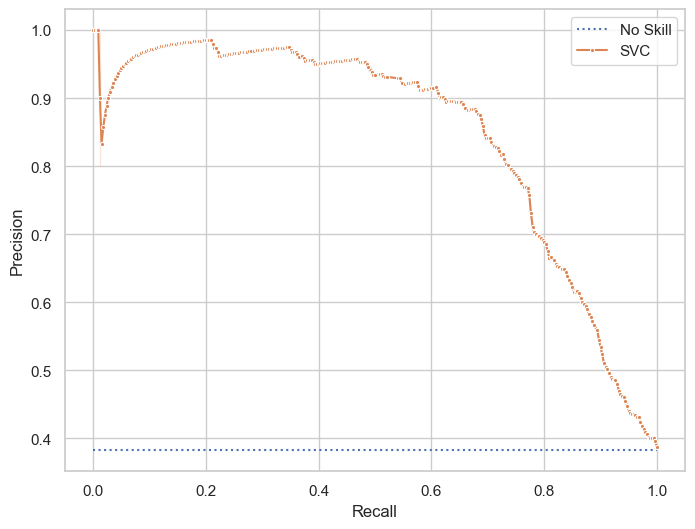

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get no-skill line
no_skill = len(y_train[y_train == 1]) / len(y_train)

# Set the style
sns.set(style="whitegrid")

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))
sns.lineplot(
    x=[0, 1],
    y=[no_skill, no_skill],
    linestyle='dotted',
    label='No Skill'
)
sns.lineplot(
    x=lr_recall,
    y=lr_precision,
    marker='.',
    label=model_name
)

# Set axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show the legend
plt.legend()

# Show the plot
plt.show()

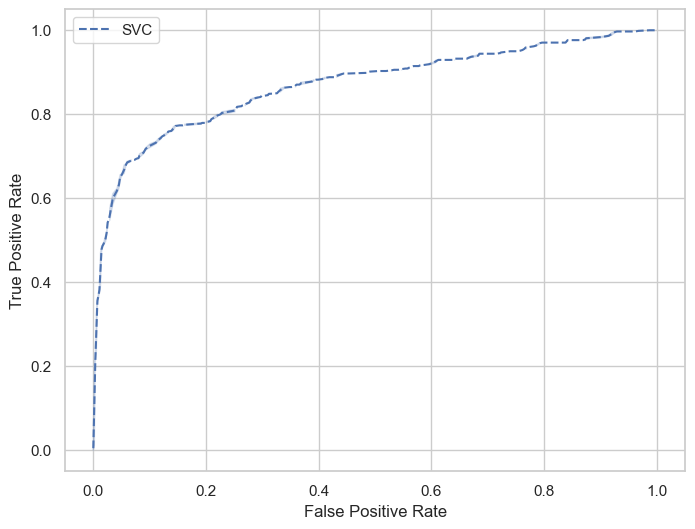

In [11]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
sns.lineplot(
    x=ns_fpr,
    y=ns_tpr,
    linestyle='--',
    label=model_name
)

# Set axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [12]:
pd.concat([real_test[["PassengerId"]], pred], axis=1).to_csv(f"../outs/{best_model.__class__.__name__}_{grid_search.best_score_ * 100:.4f}.csv", index=False)